# Introduction

### Scientific Question:
Is the adult mus musculus an appropriate model for analyzing the expression of the FTO gene in homo sapiens, based on nucleotide sequence and protein expression similarity?

### Background:
The fat mass and obesity-associated protein is also known as alpha-ketoglutarate-dependent dioxygenase FTO. Single nucleotide polymorphisms in this gene are commonly linked to obesity and other serious health conditions. In an effort to study the effects of the FTO gene, many reaserachers have utilized mice. While the FTO gene is found in both humans and mice, research has not been conducted to compare their similairties. This is extremely important in determining if the effects of single nucleotide polymorphisms will be the same in both organsims. If the gene is not similar between the organisms, mice may not be the best model to use for research regarding the human FTO gene.


### Hypothesis:
If the FTO nucleotide sequences and protein expression (in organisms such as the brain, lung, stomach, and colon) between the mus musculus and homo sapiens is >70% similarity, then mus musculus would be a good model for analyzing the effects of FTO on homo sapiens.

### Analysis and Data:

I first wanted to analyze the FTO gene from various organisms in hopes of finding conserved sequences across species.  I found FTO genes on UniProt for the following organisms: Homo Sapien (Human), Mus Musculus (Mouse), Rattus Norvegicus (Norwegian Rat), Pongo Abelii (Orangutan), and Xenopus Laevis (African Clawed Frog)

The UniProt Sequence ID's are as follows:

Human: Q9C0B1

Mouse: Q8BGW1

Rat: Q2A121

Orangutan: Q5R7X0

Frog: Q68F54

I used a multiple sequence alignment to align the genes and created a sequence logo using all 5 sequences. I then viewed the alignment using the NCBI multiple sequence alignment viewer, since Python does not contain a good way to view sequence alignments clearly. After looking at the NCBI multiple sequence alignment, I created a sequence logo of the area where the Human and Musculus gene varied the most.



# Loading in Packages

In [50]:
pip install biopython pandas seqlogo

Note: you may need to restart the kernel to use updated packages.


In [51]:
pip install jupyter biopython panel bokeh

Note: you may need to restart the kernel to use updated packages.


In [52]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import logomaker
import os, io, random
import string
import numpy as np
from Bio import AlignIO
from Bio.Seq import Seq
from Bio.Align import MultipleSeqAlignment
from Bio import SeqIO
import panel as pn
import panel.widgets as pnw
pn.extension()
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, Plot, Grid, Range1d
from bokeh.models.glyphs import Text, Rect
from bokeh.layouts import gridplot
import seqlogo

Pandas: Pandas is a data analysis tool for Python. It allows for analysis of tabular data, time series data, martix data, and other forms of observational data. The data does not have to be labeled to be used. Most data is in the structure of a Series or Dataframe. Pandas allows for easily changing the size or contents of data, alignments, grouping, subsetting, and merging data. Learn more here: https://pandas.pydata.org/docs/getting_started/install.html

matplotlib: Matplotlib allows for data visualization in Python. These visauliizations can be static, animated, or interactive. It allows for the creation of plots or figures in different styles or layouts. It also allows for zooming, panning, and updating the plots at any time. Additionally, the plots are extremely customizable in terms of font, colors, etc... Learn more here: https://matplotlib.org/

logomaker:

os:

string:

Numpy:

Bio:

panel:

Bokeh: Bokeh allows for data visualization. Any visuals made in Bokeh can be shared through webpages or notebooks. Specifically, it was used for sequence logos in this context. Bokeh allows for the creation of many different types of graphics including plots, dashboards, etc... Additionally, it allows the user to combine multiple plots. Learn more here: http://docs.bokeh.org/en/latest/index.html

seqlogo:

# Bioinformatics Analysis and Plots of Results

Multiple Sequence alignments allow for the comparison of 3 or more sequences. Once these sequences are aligned, a sequence logo can be created. A sequence logo allows us to see which parts of the sequence are conserved across the 5 species. A heavily conserved area will have large letters because all the organisms share this amino acid at this specific location. 

In the code below, I loaded in a fasta file containing 5 FTO sequences from different organsims and performed a multiple sequence alignment.

In [53]:
# Opening the 5 sequence fasta file from UniProt and alinging them.
alignments = AlignIO.parse(open("ALIGN.fasta"), "fasta")
# Check that the fasta file was opened 
print(alignments)

# print the aligned sequences to ensure they are the same length
for alignment in alignments: 
    print(alignment) 
    

<generator object parse at 0x7fc39a3c8d60>
Alignment with 5 rows and 507 columns
MKRTPTAEEREREAKKLRLLEELEDTWLPYLTPKDDEFYQQWQL...P-- Q9C0B1
MKRVQTAEEREREAKKLRLLEELEDTWLPYLTPKDDEFYQQWQL...S-- Q8BGW1
MKRVQTAEEREREAKKLRLLEELEDTWLPYLTPKDDEFYQQWQL...S-- Q2A121
MKRTPTAEEREREAKKLRLLEELEDTWLPYLTPKDDEFYQQWQL...P-- Q5R7X0
MKKRGVLCEEEKEVKKRKLLEQIGDGHLPYLSSKDDTFYDLWGS...LKL Q68F54


### Creating a Sequence Logo
In the code below, I used the alignmentto create a sequence alignment.

In [55]:
# Create a function that can take an alignment as input and return a dataframe
# The dataframe should contain counts of each amino aicd at each position
def alnSiteCompositionDF(aln, characters="ACDEFGHIKLMNPQRSTVWY"):
  alnRows = aln.get_alignment_length()
  compDict = {char:[0]*alnRows for char in characters}
  for record in aln:
    header = record.id
    seq = record.seq
    for aaPos in range(len(seq)):
      aa = seq[aaPos]
      if aa in characters:
        compDict[aa][aaPos] += 1    
  return pd.DataFrame.from_dict(compDict)

In [56]:
# Utilize the function on the alignment created earlier
alignmentSiteCompDF = alnSiteCompositionDF(alignment)
# Print the DataFrame to ensure it worked properly
alignmentSiteCompDF

,A,C,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,V,W,Y
0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,4,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,2,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,2,2,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
503,0,0,0,1,0,0,0,0,2,0,0,0,0,0,2,0,0,0,0,0
504,0,0,0,0,0,0,0,0,0,1,0,0,2,0,0,2,0,0,0,0
505,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [57]:
alignmentSiteFreqDF = alignmentSiteCompDF.div(alignmentSiteCompDF.sum(axis=1), axis=0)
alignmentSiteFreqDF

,A,C,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,V,W,Y
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.8,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.4,0.4,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.4,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,0.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
503,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.4,0.0,0.0,0.0,0.0,0.0,0.4,0.0,0.0,0.0,0.0,0.0
504,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.4,0.0,0.0,0.4,0.0,0.0,0.0,0.0
505,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


(-1.0, 507.0)

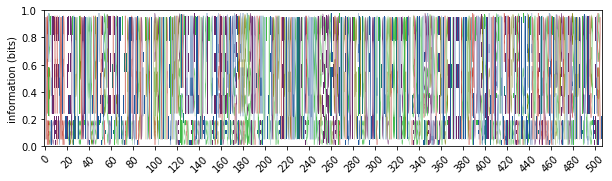

In [78]:
ww_logo = logomaker.Logo(alignmentSiteFreqDF,
                         color_scheme='NajafabadiEtAl2017',
                         vpad=.1,
                         width=1)

# style using Logo methods
ww_logo.style_xticks(anchor=0, spacing=20, rotation=45)

# style using Axes methods
ww_logo.ax.set_ylabel('information (bits)')
ww_logo.ax.set_xlim([-1, len(alignmentSiteFreqDF)])

I uploaded my alignment to the NCBI Alignment Maker in order to easily visualize the differences in amino acids between the 5 sequences. 
I first checked how similar the mouse (mus musculus) was to each of the other organisms. I found that the Mouse had extremely high identity compared to the Rat (image 1). Therefore, any differences between the Mouse and Human amino acid sequence were usually also present in the Rat sequence. 

#### Image 1
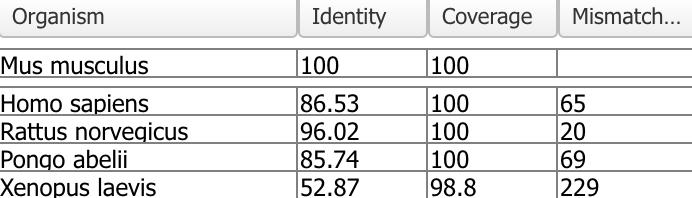

I next checked how similar the human (homo sapien) was to each of the other organisms. I found that the human had extremely high identity compared to the orangutan (image 2). Therefore, any differences between the Human and Mouse amino acid sequence were usually also present when comparing the Oranguatan and Mouse sequence.

#### Image 2
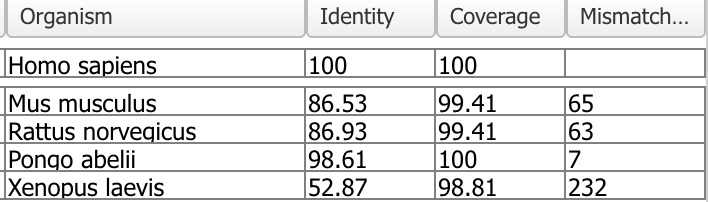

After searching through the nucleotide sequences, I found that most differences resided in between nucleotide 50 and 70. Here, we see that the Homo Sapien and Mus Musculus differ at positions 50, 51, 55, 57, 58, and 66.

#### Image 3
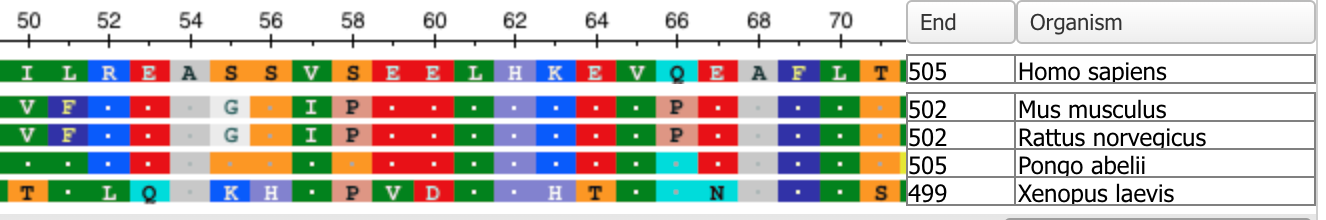

I then checked what important regions on the Homo Sapien FTO gene lie between location 50 and 70. I found a Beta-Strand region from 49 to 52 (Image 4) and a Helical Region from 59 to 74 (Image 5).

#### Image 4
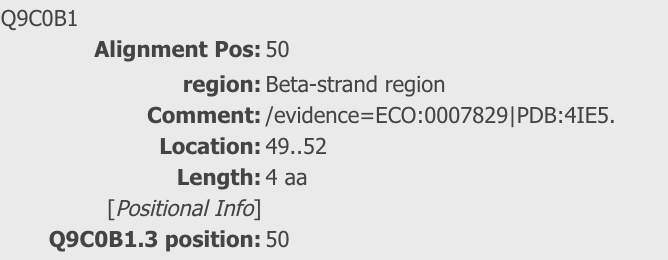

#### Image 5
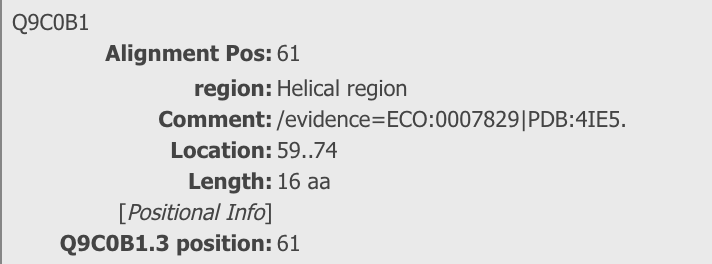

I then created a logo sequence of this portion of the FTO gene and highlighted the positions where the Human and Mouse differed.

In [59]:
Varying = alignment[:,49:72]
print(Varying)

Alignment with 5 rows and 23 columns
ILREASSVSEELHKEVQEAFLTL Q9C0B1
VFREAGSIPEELHKEVPEAFLTL Q8BGW1
VFREAGSIPEELHKEVPEAFLTL Q2A121
ILREASSVSEELHKEVQEAFLTM Q5R7X0
TLLQAKHVPVDLHHTVQNAFLSL Q68F54


In [60]:
VaryingSiteCompDF = alnSiteCompositionDF(Varying)
VaryingSiteCompDF

,A,C,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,V,W,Y
0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,1,2,0,0
1,0,0,0,0,2,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,4,0,0,0,0,0
3,0,0,0,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,2,0,0,1,0,0,0,0,0,0,2,0,0,0,0
6,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,4,0,0,0,0
7,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,3,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,2,0,0,0,0
9,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [61]:
VaryingFreqDF = VaryingSiteCompDF.div(VaryingSiteCompDF.sum(axis=1), axis=0)
VaryingFreqDF

,A,C,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,V,W,Y
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.4,0.0,0.0
1,0.0,0.0,0.0,0.0,0.4,0.0,0.0,0.0,0.0,0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.8,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.4,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.8,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6,0.0,0.0,0.4,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0


(-1.0, 23.0)

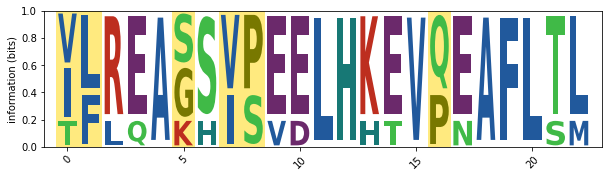

In [62]:
ww_logo = logomaker.Logo(VaryingFreqDF,
                         color_scheme='NajafabadiEtAl2017',
                         vpad=.1,
                         width=.8)

# style using Logo methods
ww_logo.style_xticks(anchor=0, spacing=5, rotation=45)
ww_logo.highlight_position(p=0, color='gold', alpha=.5)
ww_logo.highlight_position(p=1, color='gold', alpha=.5)
ww_logo.highlight_position(p=5, color='gold', alpha=.5)
ww_logo.highlight_position(p=7, color='gold', alpha=.5)
ww_logo.highlight_position(p=8, color='gold', alpha=.5)
ww_logo.highlight_position(p=16, color='gold', alpha=.5)

# style using Axes methods
ww_logo.ax.set_ylabel('information (bits)')
ww_logo.ax.set_xlim([-1, len(VaryingFreqDF)])

Now that I have examined, the sequence I set out to examine the protein structure. First, I loaded in the Homo Sapien FTO protein.

In [84]:
# PROTEIN STRUCTURE: PDB
import nglview
view = nglview.show_pdbid("4IE5") 
view.add_representation('licorice', selection='chain A')
view

NGLWidget()

In [64]:
import numpy
from Bio.PDB.PDBParser import PDBParser

parser = PDBParser()
structure = parser.get_structure("4IE5", "4ie5.pdb")

residues = [r for r in structure.get_residues()]        # You don’t need the extensive list traversal you were doing before because there are many get_*() methods
# Calculate the distance between the alpha carbons for a pair of residues
one  = residues[0]["CA"].get_coord()
two = residues[1]["CA"].get_coord()
print('{} - {} = {}'.format(one,two, numpy.linalg.norm(one-two)))

[ 46.006  13.274 -31.944] - [ 43.404  11.31  -29.985] = 3.8033385276794434


In [83]:
parser = PDBParser()
structure = parser.get_structure("Mouse", "Mouse.pdb")

residues = [r for r in structure.get_residues()]        # You don’t need the extensive list traversal you were doing before because there are many get_*() methods
# Calculate the distance between the alpha carbons for a pair of residues
one  = residues[0]["CA"].get_coord()
two = residues[1]["CA"].get_coord()
print('{} - {} = {}'.format(one,two, numpy.linalg.norm(one-two)))

[  2.473 -13.067 -16.677] - [ -0.255 -12.891 -13.967] = 3.8492937088012695


# Analysis of Results

From Image 1, we saw that the identity match between the homo sapien and mus musculus FTO gene is around 87%. This is much higher than the 70% threshold I had set in the hypothesis.

Additionally, the proteins encoded by the genes appear to be very similar.
Although not identical, the distance between the alpha carbons is 3.80 for the human and 3.85 for the mouse.